<a href="https://colab.research.google.com/github/Etb23/IAyRN-Acts/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5? Se utilizaron las mismas pero en esta actividad se pueden disminuir hasta 5 o 4 etapas.

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué? Si, se obtuvo un mayor porcentaje de precision ya que el conjunto de datos mnist estan en baja resolucion y con pocos detalles y esto hace que la complejidad de este disminuya y se facilite el detectar dichos patrones.

In [ ]:
#Actividad 9: Redes neuronales
#Enrique Treviño Benavides 1946906
#Hora: N4

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [2]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Sies', 'Siete', 'Ocho', 'Nueve']

In [4]:
x_train.shape

(60000, 28, 28)

(60000, 28, 28)

In [5]:
len(y_train)

60000

60000

In [6]:
x_test.shape

(10000, 28, 28)

(10000, 28, 28)

In [7]:
len(y_test)

10000

10000

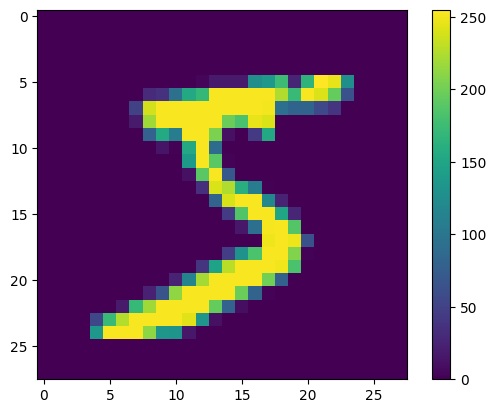

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = x_train / 255.0

test_images = x_test / 255.0

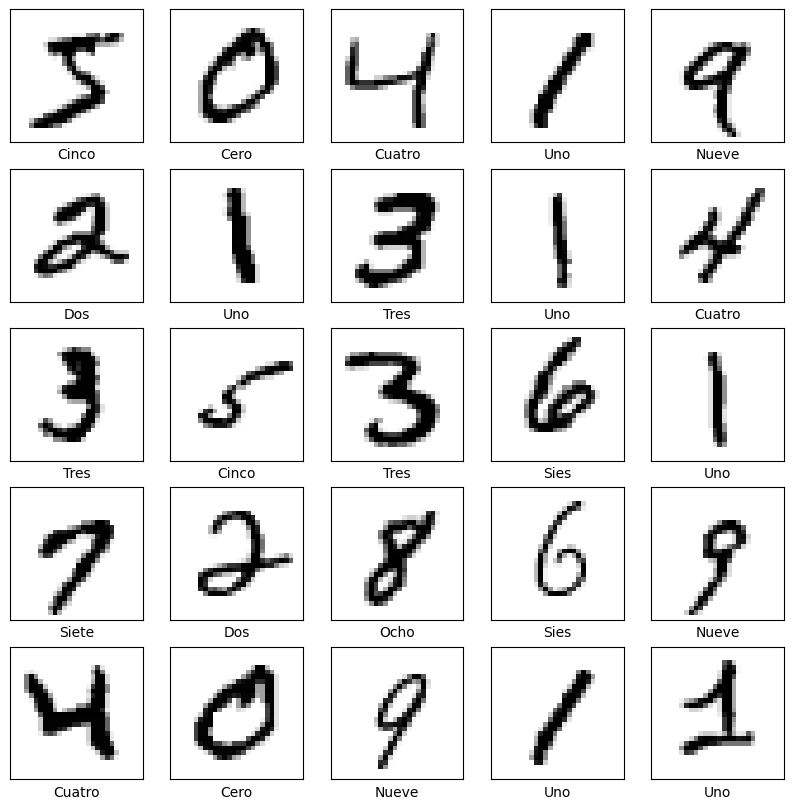

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8924 - loss: 1.1953
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - accuracy: 0.9805 - loss: 0.0649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9872 - loss: 0.0421
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9890 - loss: 0.0348
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9925 - loss: 0.0229
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 23ms/step - accuracy: 0.9929 - loss: 0.0240
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9952 - loss: 0.0156
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9957 - loss: 0.0166
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9965 - loss: 0.0110
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9960 - loss: 0.0144


In [14]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.9814 - loss: 0.1283

Test accuracy: 0.9814000129699707


In [15]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [16]:
predictions[0]

array([1.9935069e-23, 6.4372371e-21, 6.5481413e-14, 2.8563802e-18,
       2.3081503e-19, 1.1103606e-26, 9.2119695e-32, 9.9999994e-01,
       1.1772790e-19, 5.2067039e-17], dtype=float32)

In [17]:
np.argmax(predictions[0])


7

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

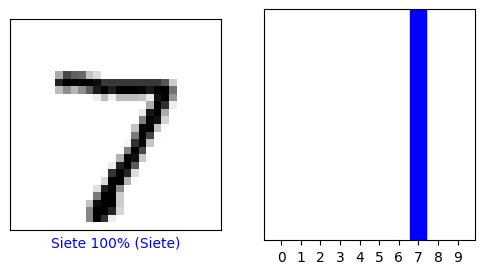

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

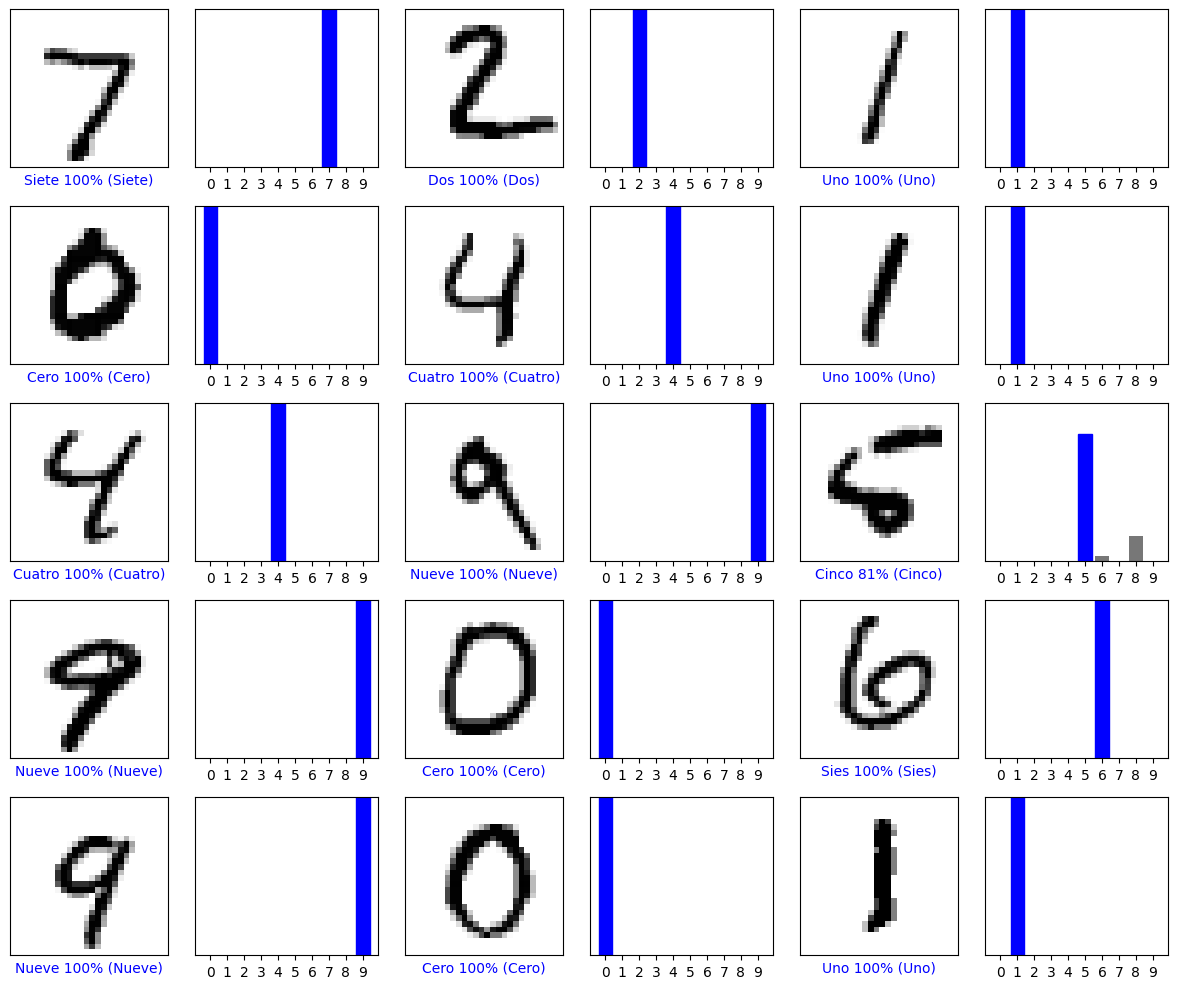

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [21]:
img = x_test[1]

print(img.shape)

(28, 28)

(28, 28)


(28, 28)

In [22]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[3.4472957e-16 1.2653611e-07 9.9999988e-01 2.9885443e-17 1.8084341e-21
  5.7528768e-27 1.7060523e-25 8.3963180e-13 3.5138846e-21 8.1730816e-21]]


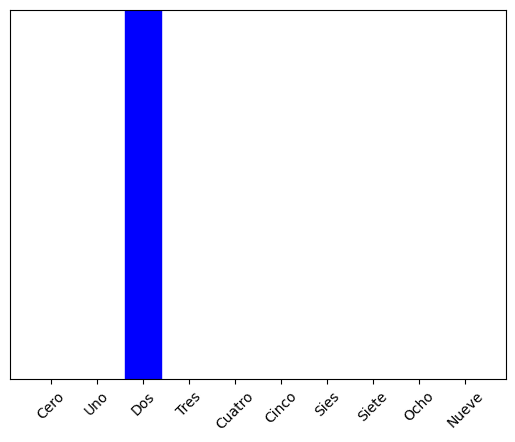

In [24]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [25]:
np.argmax(predictions_single[0])

2

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.9181070e-26 2.5862377e-20 2.7020530e-28 6.1474524e-27 6.2231511e-25
  7.0224935e-25 1.0000000e+00 0.0000000e+00 4.9639163e-24 2.6640884e-38]]


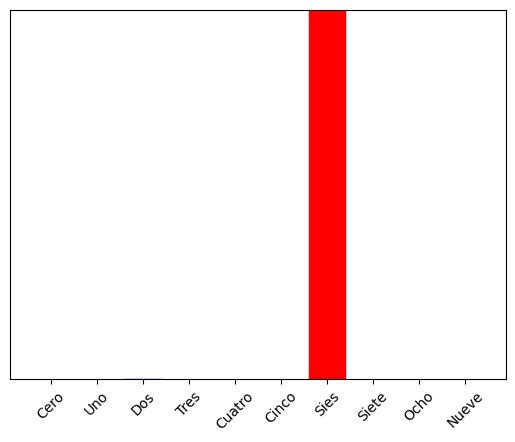

In [26]:
img = x_test[-1]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2.1073914e-19 1.0000000e+00 1.5484904e-19 2.3202226e-23 3.0061877e-13
  2.5766007e-25 9.3438066e-24 3.4520570e-14 9.6435446e-15 5.1013225e-18]]


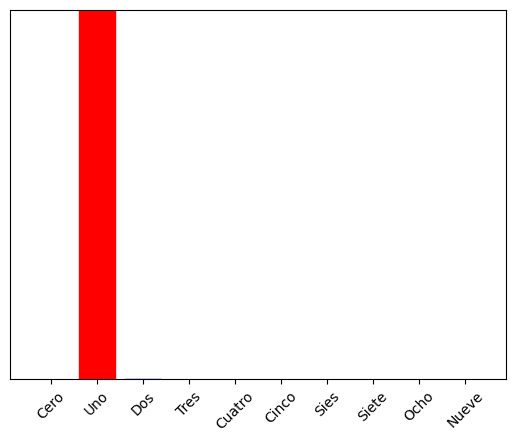

In [27]:
img = x_test[5]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[2.1850653e-32 1.1162791e-22 3.9049445e-30 1.0000000e+00 1.0041493e-34
  6.2819541e-22 0.0000000e+00 3.0293171e-23 1.2110572e-23 5.2854682e-18]]


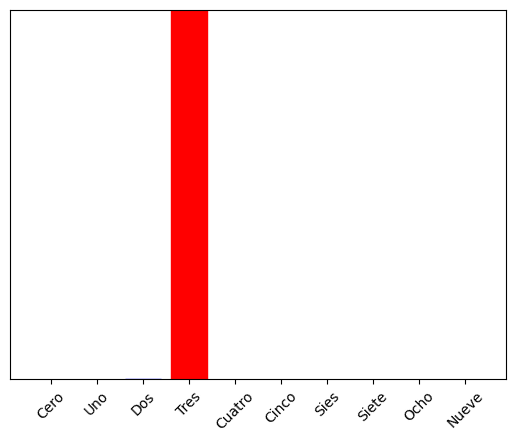

In [28]:
img = x_test[500]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[9.8461654e-31 1.5178916e-26 0.0000000e+00 4.0683598e-38 1.2052172e-32
  6.0200208e-28 1.0000000e+00 0.0000000e+00 1.1260815e-30 0.0000000e+00]]


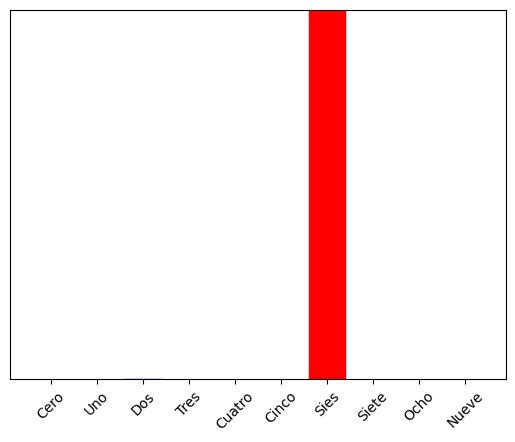

In [29]:
img = x_test[600]

print(img.shape)

(28, 28)

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)